# Testing Synthetic Motion Parameters

In [363]:
%matplotlib inline
import matplotlib.pyplot as plt

In [364]:
import numpy as np
import cv2

In [368]:
in_nifti = '/Users/kristianeschenburg/Desktop/285345.T1w_restore_brain.nii.gz'
img = nb.load(in_nifti)
data = img.get_data()
print('Shape: {:}'.format(data.shape))

Shape: (260, 311, 260)


In [369]:
data = np.fliplr(data)
data = np.swapaxes(data,0,2)

In [370]:
D = data[130,:,:]
D = (D-D.min())/D.max()

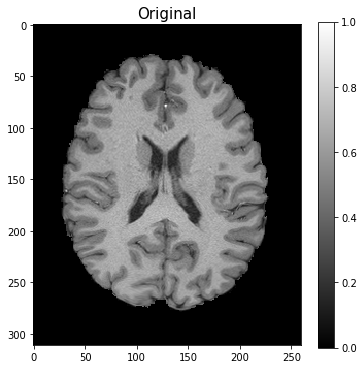

In [371]:
fig = plt.figure(figsize=(6,6))
plt.imshow(np.real(D),cmap='gray'); plt.colorbar();
plt.title('Original',fontsize=15);
plt.savefig('/Users/kristianeschenburg/Documents/Code/kristianeschenburg.github.io/figures/openCV/original.jpg')

In [329]:
transform_matrix = np.array([[1,0,20],[0,1,0]]).astype(np.float32)
temp = cv2.warpAffine(D,transform_matrix,D.T.shape)

transform_matrix2 = np.array([[1,0,10],[0,1,0]]).astype(np.float32)
temp2 = cv2.warpAffine(D,transform_matrix2,D.T.shape)

transform_matrix3 = np.array([[1,0,0],[0,1,20]]).astype(np.float32)
temp3 = cv2.warpAffine(D,transform_matrix3,D.T.shape)

transform_matrix4 = np.array([[1,0,-5],[0,1,0]]).astype(np.float32)
temp4 = cv2.warpAffine(D,transform_matrix4,D.T.shape)

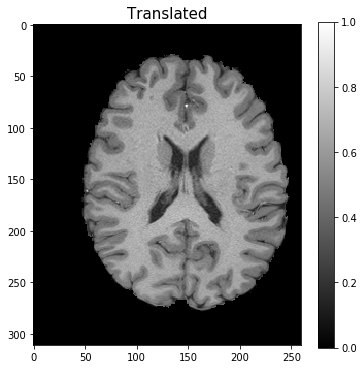

In [330]:
fig = plt.figure(figsize=(6,6));
plt.imshow(temp,cmap='gray');
plt.colorbar();
plt.title('Translated',fontsize=15);
plt.savefig('/Users/kristianeschenburg/Documents/Code/kristianeschenburg.github.io/figures/openCV/translated.jpg')

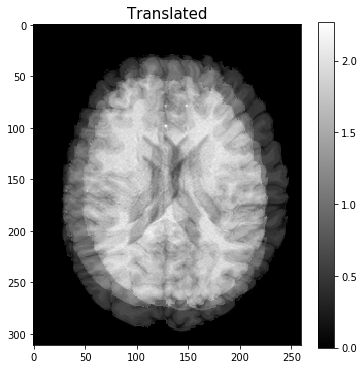

In [331]:
fig = plt.figure(figsize=(6,6));
plt.imshow(D+temp+temp3,cmap='gray');
plt.colorbar();
plt.title('Translated',fontsize=15);
plt.savefig('/Users/kristianeschenburg/Documents/Code/kristianeschenburg.github.io/figures/openCV/translated.jpg')

# Translations

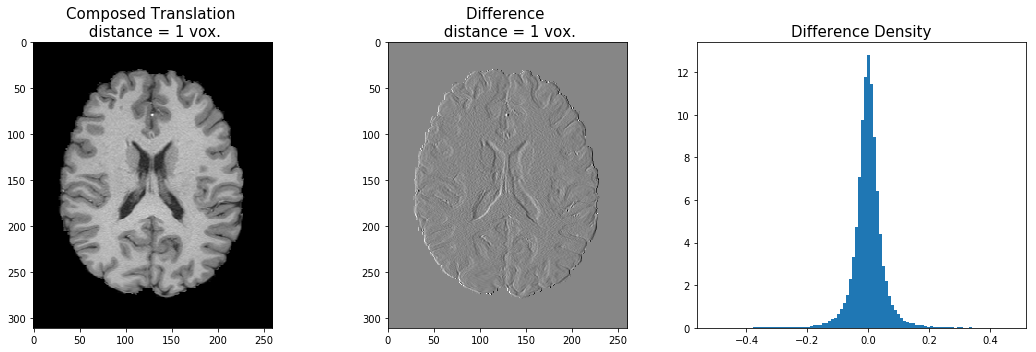

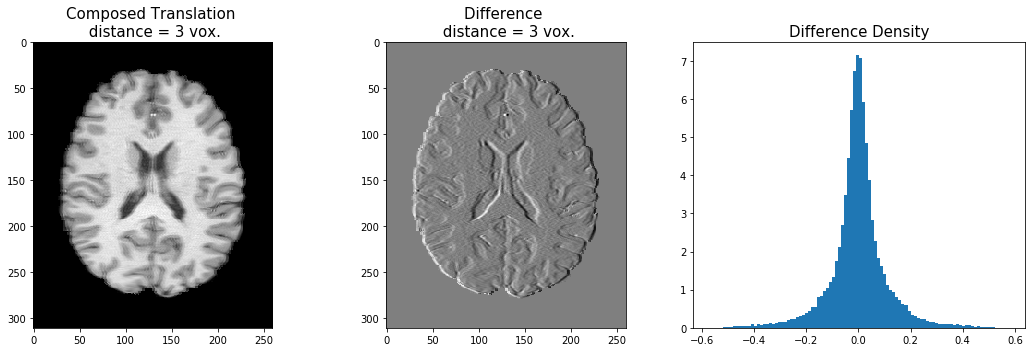

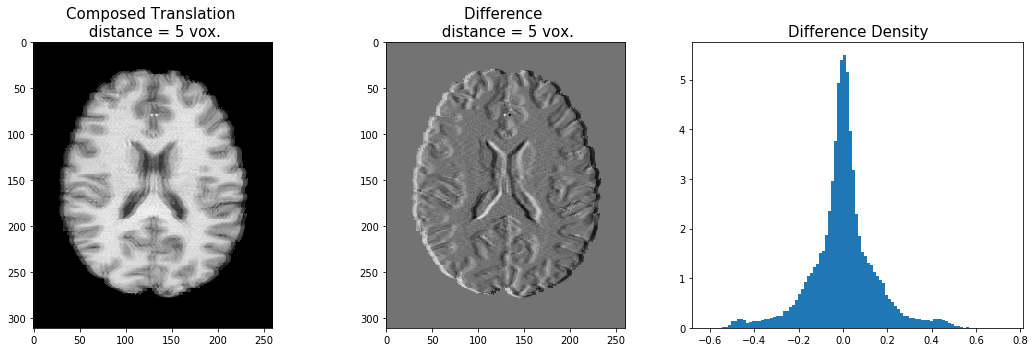

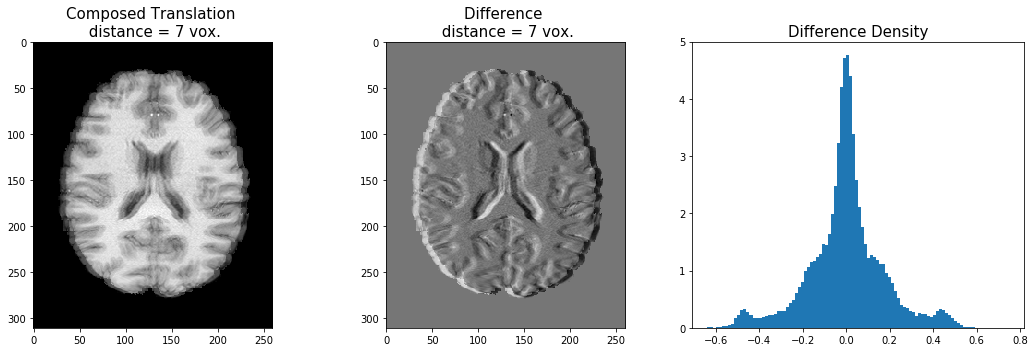

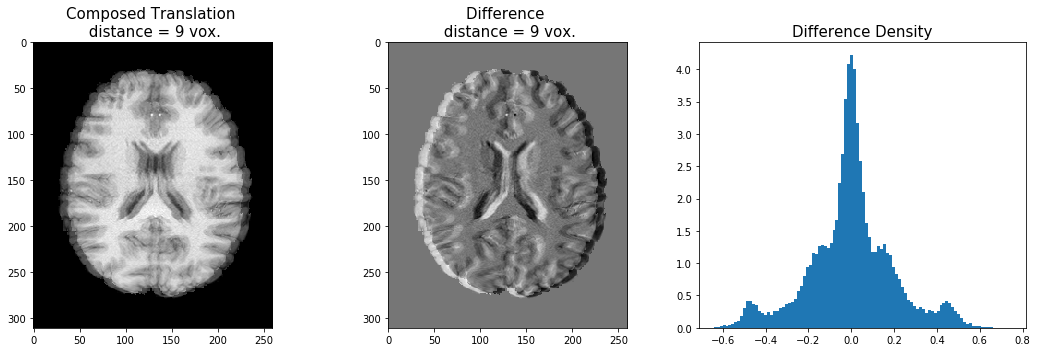

In [361]:
rows,cols = D.shape
for trans in [1,3,5,7,9]:
    T = np.array([[1,0,trans],[0,1,0]]).astype(np.float32)
    translated = cv2.warpAffine(D,T,D.T.shape)
    difference = D-translated
    res = difference.reshape(np.product(difference.shape))
    fig,[ax1,ax2,ax3] = plt.subplots(1,3,figsize=(15,5))
    ax1.imshow(translated+D, cmap='gray')
    ax1.set_title('Composed Translation \n distance = {:} vox.'.format(trans), fontsize=15)
    ax2.imshow(D-translated, cmap='gray')
    ax2.set_title('Difference \n distance = {:} vox.'.format(trans), fontsize=15)
    ax3.hist(res[res!=0],100,density=True)
    ax3.set_title('Difference Density', fontsize=15)
    plt.tight_layout()
    plt.show()

# Rotations

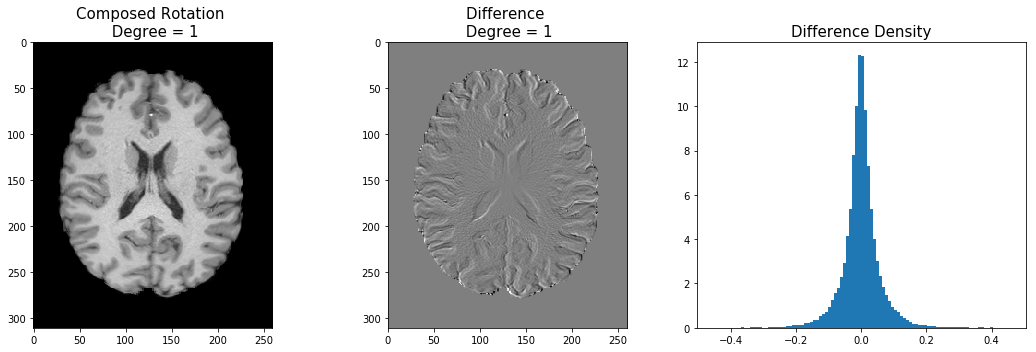

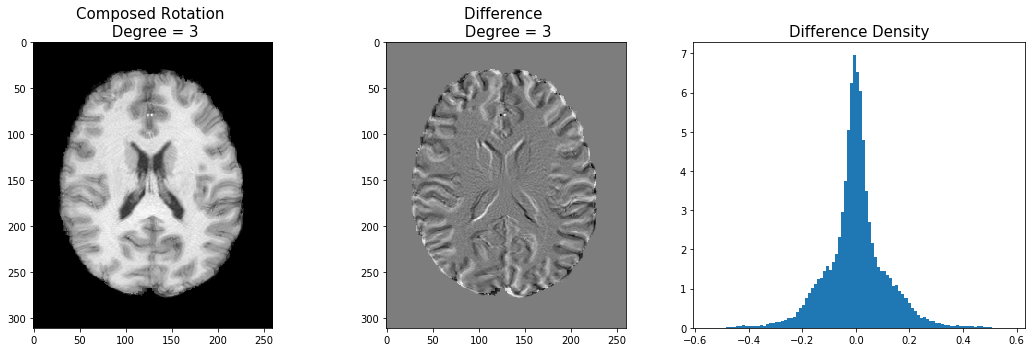

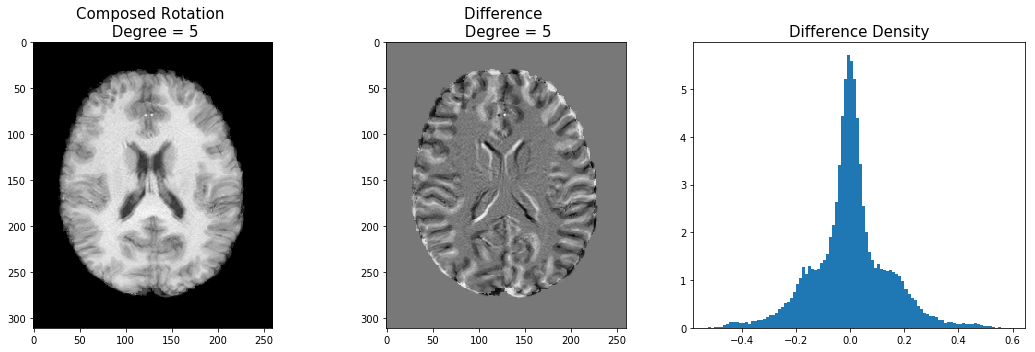

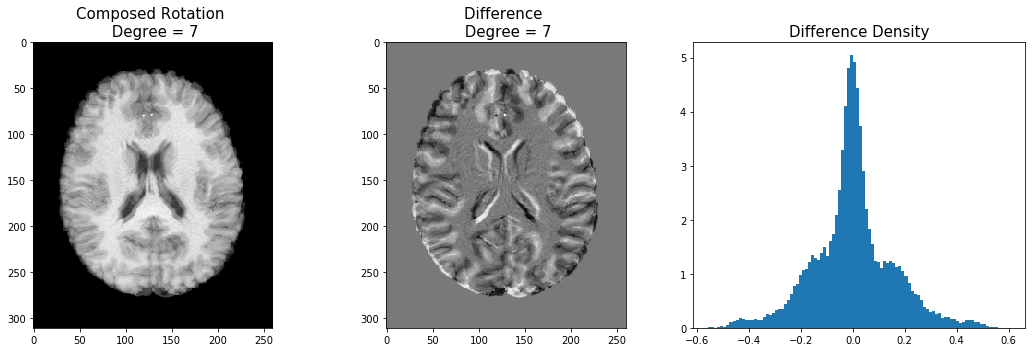

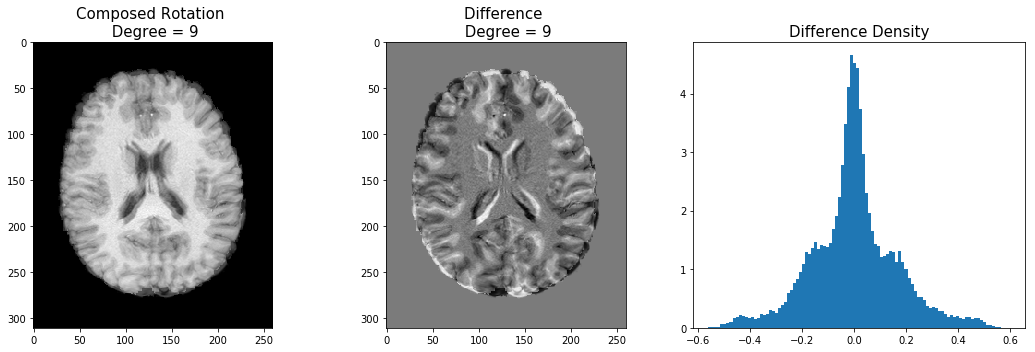

In [362]:
rows,cols = D.shape
for rot in [1,3,5,7,9]:
    M = cv2.getRotationMatrix2D((cols/2,rows/2),rot,1) 
    rotated = cv2.warpAffine(D,M,D.T.shape)
    difference = D-rotated
    res = difference.reshape(np.product(difference.shape))
    fig,[ax1,ax2,ax3] = plt.subplots(1,3,figsize=(15,5))
    ax1.imshow(rotated+D, cmap='gray')
    ax1.set_title('Composed Rotation \n Degree = {:}'.format(rot), fontsize=15)
    ax2.imshow(D-rotated, cmap='gray')
    ax2.set_title('Difference \n Degree = {:}'.format(rot), fontsize=15)
    ax3.hist(res[res!=0],100,density=True)
    ax3.set_title('Difference Density', fontsize=15)
    plt.tight_layout()
    plt.show()

# Rotation + Translations with Random +/- change in degree / translation

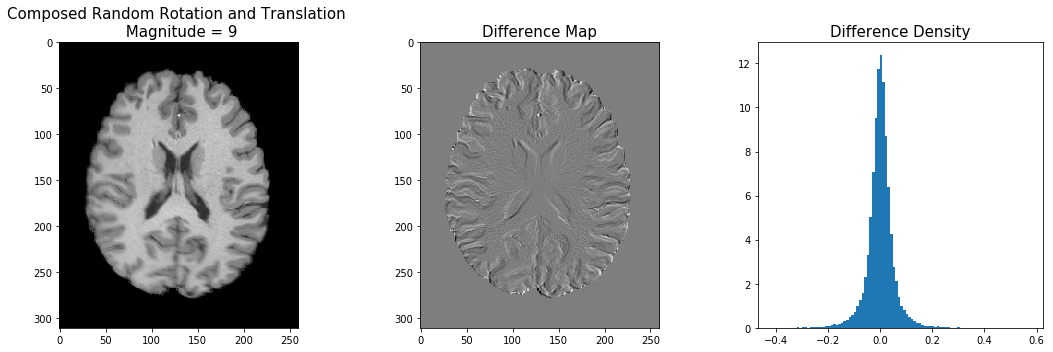

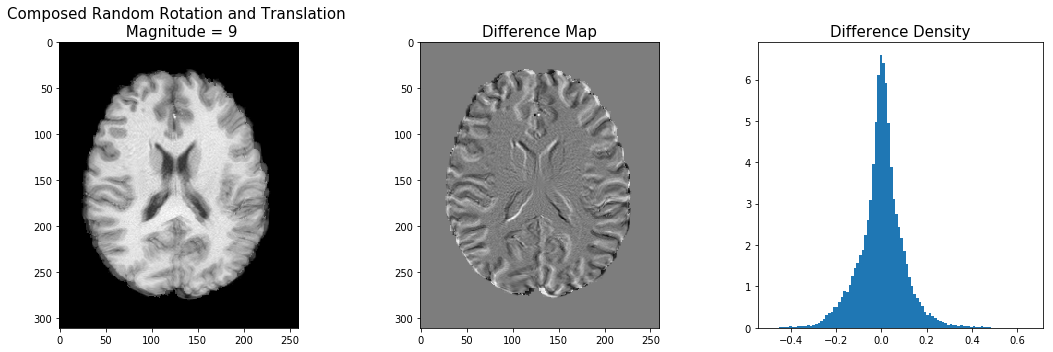

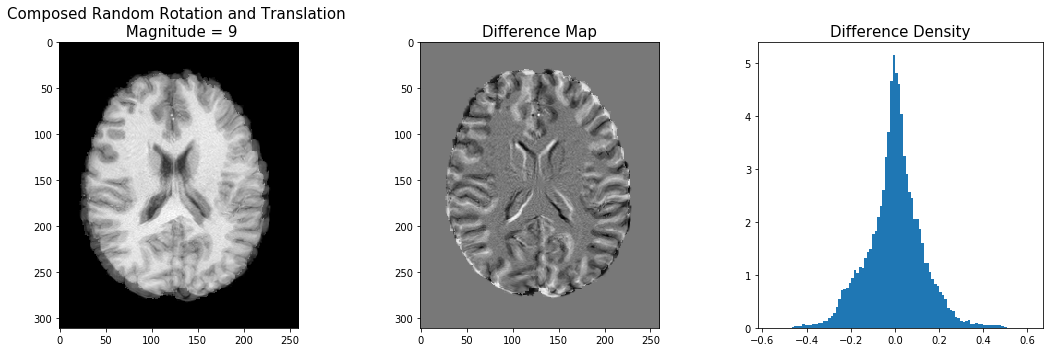

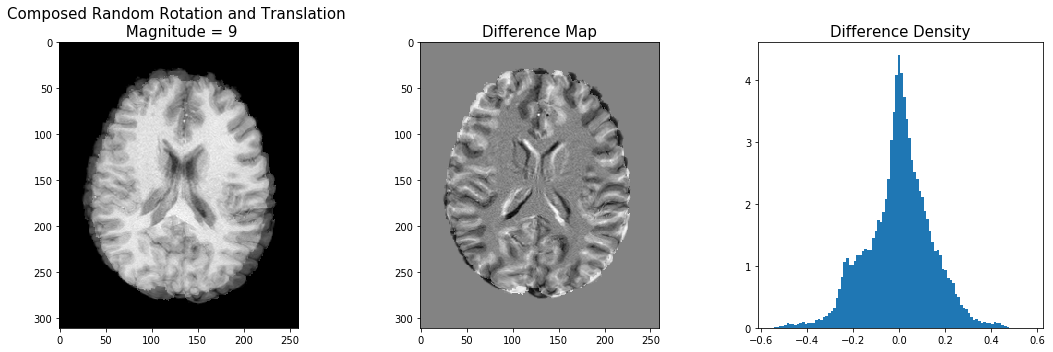

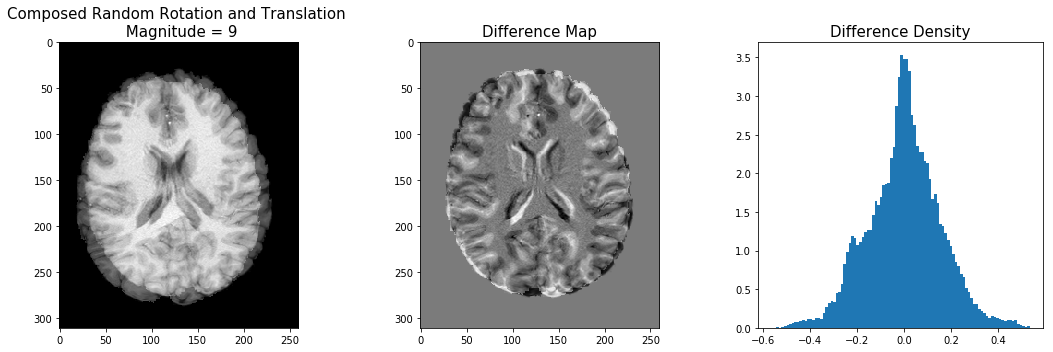

In [390]:
rows,cols = D.shape
for rt in [1,3,5,7,9]:
    M = cv2.getRotationMatrix2D((cols/2,rows/2),np.random.choice([-1,1],1)[0]*rt,1) 
    rotated = cv2.warpAffine(D,M,D.T.shape)
    T = np.array([[1,0,np.random.choice([-1,1],1)[0]*rt],[0,1,np.random.choice([-1,1],1)[0]*rt]]).astype(np.float32)
    translated = cv2.warpAffine(D,T,D.T.shape)
    
    movement = (rotated + translated)/2
    
    difference = D-movement
    res = difference.reshape(np.product(difference.shape))
    fig,[ax1,ax2,ax3] = plt.subplots(1,3,figsize=(15,5))
    ax1.imshow(movement, cmap='gray')
    ax1.set_title('Composed Random Rotation and Translation \n Magnitude = {:}'.format(rot), fontsize=15)
    ax2.imshow(D-rotated, cmap='gray')
    ax2.set_title('Difference Map'.format(rot), fontsize=15)
    ax3.hist(res[res!=0],100,density=True)
    ax3.set_title('Difference Density', fontsize=15)
    plt.tight_layout()
    plt.show()